# [Aula 6] Segmentação de imagens

Prof. João Fernando Mari (joaofmari@gmail.com)

Universidade Federal de Viçosa - *campus* Rio Paranaíba

SIN 393 - Introdução à Visão Computacional (2018-2)

* Segmentação de imagens:
    * Consiste em subdividir uma imagem em regiões ou objetos que a compõem.
    * Não é um processo trivial e é uma das tarefas mais difíceis em processamento de imagens.
    
* A maioria dos algoritmos de segmentação baseia-se nas propriedades básicas de valores de intensidade:
    * Descontinuidade
    * Similaridade

## Limiarização 

Segmentação por limiarização tem uma posição central nas aplicações de processamenrto e análise de imagens.

Geralmente são métodos que apresentam facilidade de implementação e baixo custo computacional.

* Limiarização global:
    * Quando T é uma constante aplicável a uma imagem inteira.

<img src='figuras/aula_06/Fig_03.02_OK.png' style="height:300px">

*FIGURA 1: Funções de transformação de intensidade. (a) Função de alargamento de contraste. (b) Função de limiarização. Fonte [2]*

<img src='figuras/aula_06/limiar_global.png' style="height:300px">

*FIGURA 2: Exemplo de um histograma separado por um limiar (T) global. Fonte: [2].*

* Limiarização local (variável ou regional):
    * O valor de T muda ao longo da imagem.




* Limiarização múltipla:
    * Classifica os pixels utilizando dois ou mais limiares, gerando três (ou mais) grupos de objetos:
    * EX.: Fundo, objetos do tipo #1 e objetos do tipo #2.
    * Obter os valores de múltiplos limiares é difícil.

<img src='figuras/aula_06/limiar_multipla.png' style="height:300px">

*FIGURA 2: Exemplo de um histograma separado por dois limiares (T1 e T2), limiarização múltipla. Fonte: [2].*

In [1]:
import numpy as np
from scipy import misc
from skimage import img_as_float, filters, data, measure, color, morphology, util
import matplotlib.pyplot as plt

# %matplotlib notebook
%matplotlib inline

In [2]:
# Carrega a imagem.
im = data.coins()

# Converte para float [0-1]
im = img_as_float(im.astype(np.uint8))

In [3]:
limiares = [0.1, 0.2, 0.5, 0.7, 0.9]

imagens = []

imagens.append(im)

for limiar in limiares:
    im_temp = im > limiar
    imagens.append(im_temp)

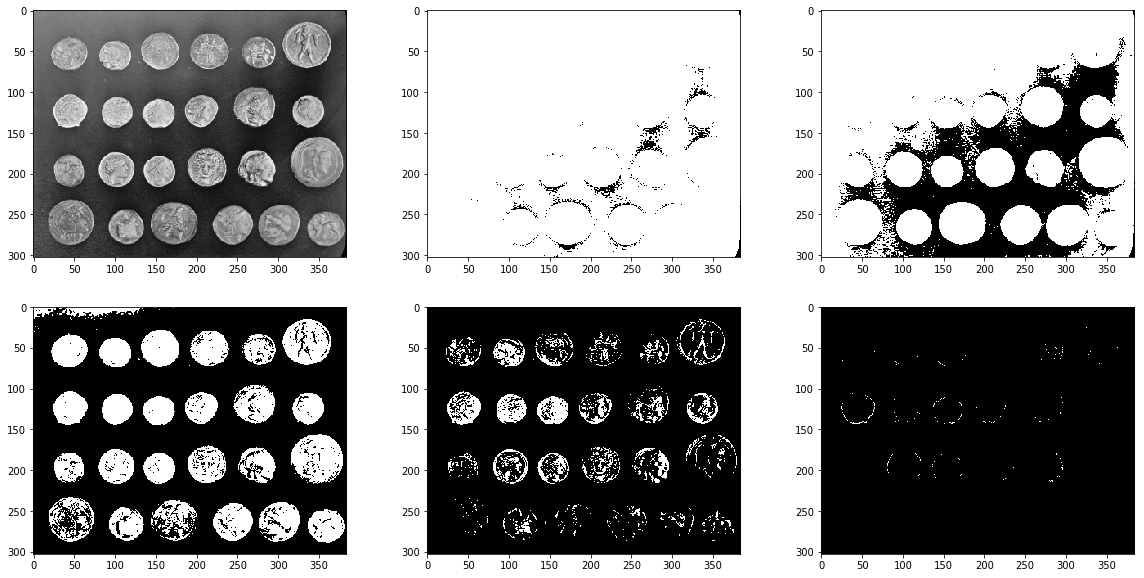

In [4]:
plt.figure(figsize=(20,10))

for i, im in enumerate(imagens):
    plt.subplot(2,3,i+1)
    plt.imshow(imagens[i], cmap='gray')
    # plt.title('Imagem original')

# Mostra as figuras na tela
plt.show()

### Limiarização global simples

A função abaixo implementaum método itertivo simples para encontrar o limiar para uma imagem.

Digite o código abaixo em um arquivo "limiarizacao_simples.py".

Execute o código a partir da linha de comando.


Iteracao:  0
 - T anterior:  0.1
 - T atual:     0.23526893853148698
 - delta_T      0.13526893853148697

Iteracao:  1
 - T anterior:  0.23526893853148698
 - T atual:     0.32323202644545423
 - delta_T      0.08796308791396726

Iteracao:  2
 - T anterior:  0.32323202644545423
 - T atual:     0.3716258334458229
 - delta_T      0.04839380700036866

Iteracao:  3
 - T anterior:  0.3716258334458229
 - T atual:     0.3979501045502393
 - delta_T      0.02632427110441643

Iteracao:  4
 - T anterior:  0.3979501045502393
 - T atual:     0.4106239381482553
 - delta_T      0.012673833598015993

Iteracao:  5
 - T anterior:  0.4106239381482553
 - T atual:     0.41612119531050373
 - delta_T      0.0054972571622484145

T final:  0.41612119531050373


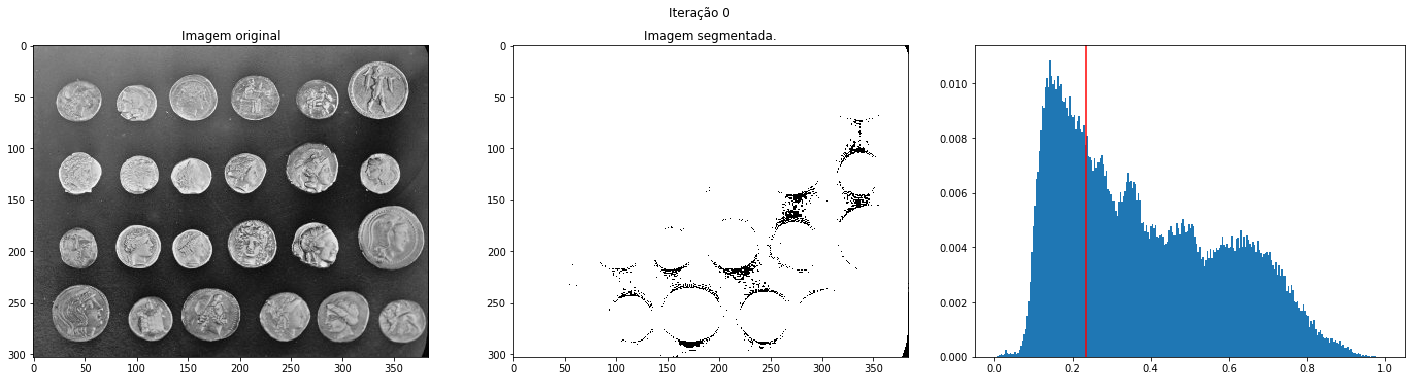

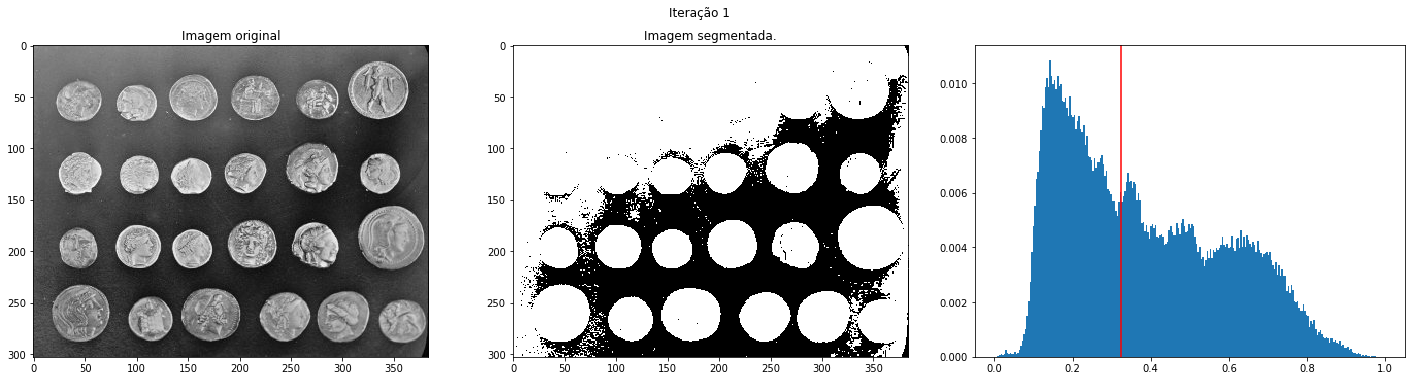

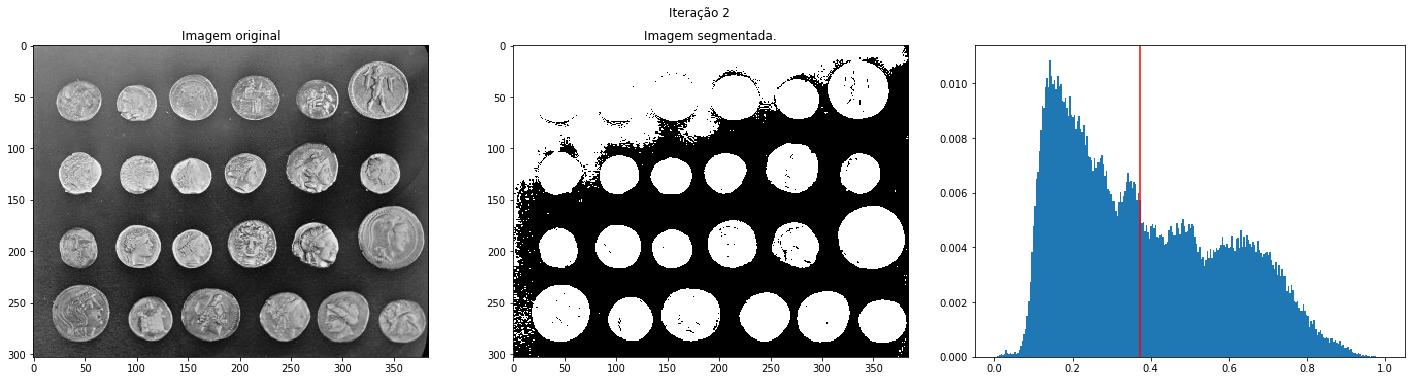

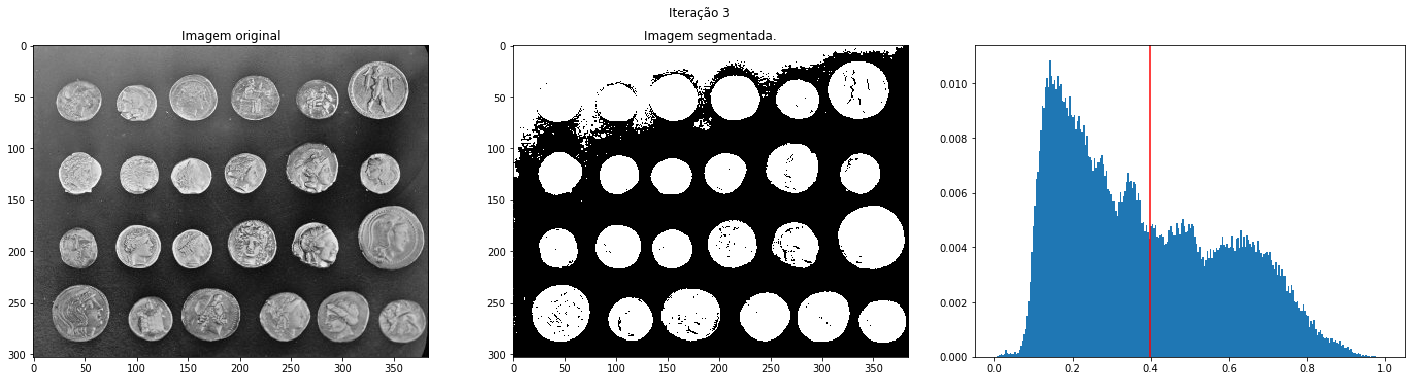

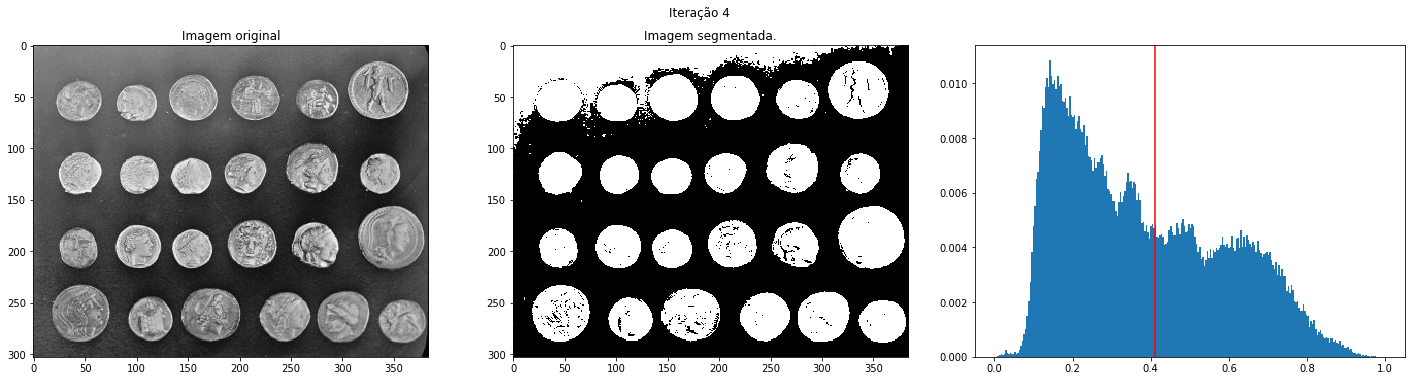

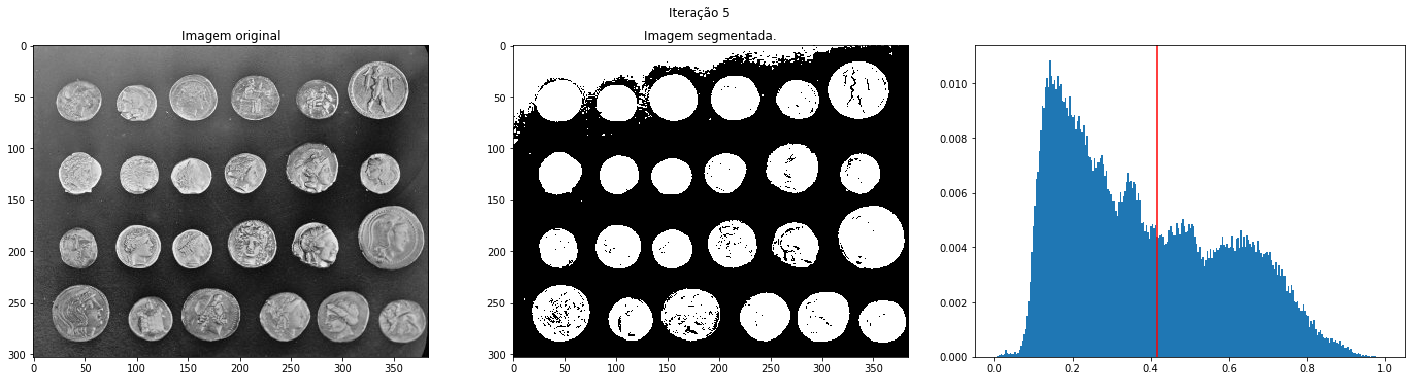

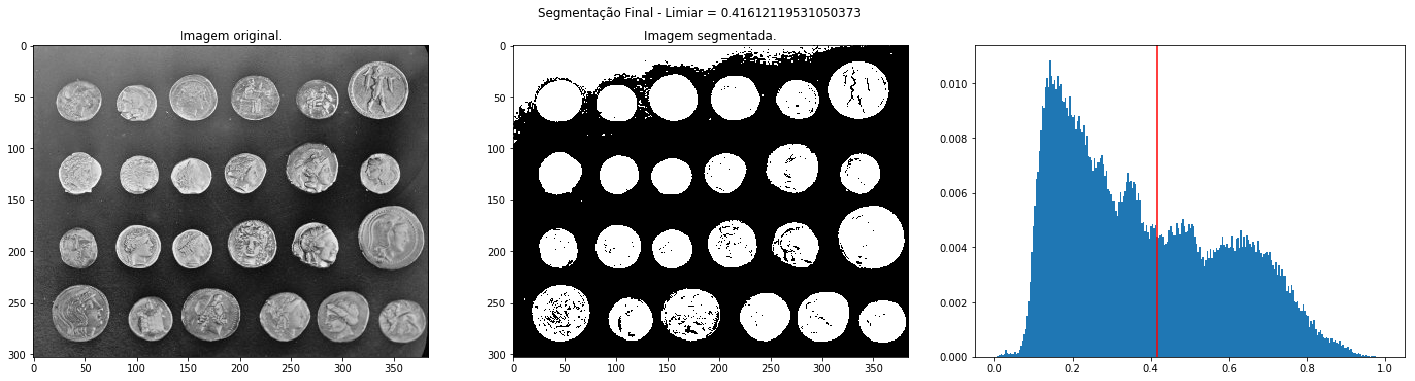

In [5]:
# Importa as bibliotecas necessárias
import numpy as np
from scipy import misc
from skimage import img_as_float, data
import matplotlib.pyplot as plt

def limiar_global_simples(im, T_ini=None, min_delta_T=None, plot=False):
    """
    Algoritmo de limiarização iterativa simples.
    """
    if T_ini==None:
        # Nenhum valor inicial atribuido:
        # - Considerar a intensidade média.
        T_ini = im.mean()
    if min_delta_T==None:
        # Se min_delta_T nao informado:
        # - 'min_delta_T' eh 1% da maior intensidade!
        min_delta_T = im.max() * 0.01

    # Inicializa T com T_ini.
    T = T_ini
    # Inicializa delta_T com Infinito. 
    delta_T = np.inf

    # Iteracao
    i = 0
    while delta_T >= min_delta_T:
        # Segmenta a imagem usando T.
        g_bw = im > T

        # Calcula o numero de pixels de objeto e de fundo.
        num_px_bg, num_px_fg = np.bincount(g_bw.flatten()) 

        # Constroi imagem com os pixels de objeto.
        g_fg = im * g_bw
        # Constroi imagem com os pixels de fundo.
        g_bg = im * np.invert(g_bw)

        # Intensidade média - pixels de objeto
        fg_mean = g_fg.sum() / float( num_px_fg )
        # Intensidade média – pixels de fundo
        bg_mean = g_bg.sum() / float( num_px_bg )

        # Armazena valor atual de T.
        T_old = T
        
        # Calcula um novo limiar T.        
        T = 0.5 * (fg_mean + bg_mean)
        # Calcula o novo valor de delta_T.
        delta_T = np.abs(T - T_old)

        # Mostra informacoes na tela
        print('\nIteracao: ', i)
        print(' - T anterior: ', T_old)
        print(' - T atual:    ', T)
        print(' - delta_T     ', delta_T)

        # Plota as imagens parciais
        if plot == True:
            plt.figure(figsize=(20,5))
            plt.suptitle(str('Iteração ' + str(i)) , y=1.05)

            plt.subplot(131); 
            plt.imshow(im, cmap='gray')
            plt.title('Imagem original')

            plt.subplot(132); 
            plt.imshow(g_bw, cmap='gray')
            plt.title('Imagem segmentada.')

            plt.subplot(133); 
            # Plota histograma
            ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
            weights = np.ones(im.ravel().shape)/float(im.size)
            plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
            plt.axvline(T, color='r')

            plt.tight_layout()
            # plt.show()

        # Incrementa i
        i = i + 1

    # Retorna o limiar T.
    return T

if __name__ == '__main__':
    """
    """
    # Carrega a imagem
    # ----------------
    ## im = misc.ascent()
    ## im = data.camera()
    im = data.coins()

    im = img_as_float(im.astype(np.uint8))

    # Chama a funcao para calculo do limiar global iterativo
    # ------------------------------------------------------
    valor_T = limiar_global_simples(im, 0.1, plot=True)
    # TESTE
    print('\nT final: ', valor_T)

    # Segmenta a imagem com o limiar T.
    im_bw = im > valor_T

    # Mostra a imagem final
    # ---------------------
    plt.figure(figsize=(20,5))
    plt.suptitle('Segmentação Final - Limiar = ' + str(valor_T), y=1.05)
    plt.subplot(131)
    plt.imshow(im, cmap='gray')
    plt.title('Imagem original.')
    plt.subplot(132)
    plt.imshow(im_bw, cmap='gray')
    plt.title('Imagem segmentada.')
    plt.subplot(133); 
    # Plota histograma
    ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
    weights = np.ones(im.ravel().shape)/float(im.size)
    plt.hist(im.ravel(), bins=256, weights=weights, range=(0,1))
    plt.axvline(valor_T, color='r')

    # Mostra as figuras na tela
    # -------------------------
    plt.tight_layout()
    plt.show()

## Otsu

O método de Otsu calcula o limiar ótimo para segmentar uma imagem maximizando a variância entre as classes.

In [6]:
im = data.coins()

im = img_as_float(im)

In [7]:
metodos = ['Otsu', 'Yen', 'ISODATA', 'Li']

limiares = []
# Limiar de Otsu
limiares.append(filters.threshold_otsu(im))

# Limiar de Yen
limiares.append(filters.threshold_yen(im))

# Limiar Isodata
limiares.append(filters.threshold_isodata(im))

# Limiar de Li
limiares.append(filters.threshold_li(im))

In [8]:
for metodo, limiar in zip(metodos, limiares):
    print('Limiar de %s: %.6f' % (metodo, limiar))

Limiar de Otsu: 0.417256
Limiar de Yen: 0.432636
Limiar de ISODATA: 0.417256
Limiar de Li: 0.378594


In [9]:
imagens_seg = []
for limiar in limiares:
    im_temp = im > limiar
    imagens_seg.append(im_temp)

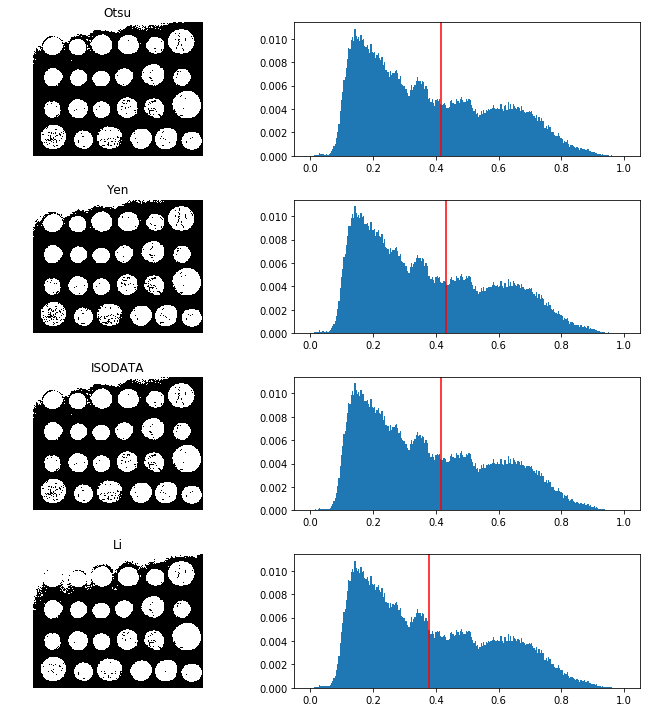

In [10]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
for i in range(len(imagens_seg)):
    # Plota imagem
    im_ = ax[i, 0].imshow(imagens_seg[i], cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title(str(metodos[i]))

    # Plota histograma
    ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
    weights = np.ones(im.ravel().shape)/float(im.size)
    ax[i, 1].hist(im.ravel(), bins=256, weights=weights, range=(0,1))
    ax[i, 1].axvline(limiares[i], color='r')
    
plt.tight_layout()
plt.show()

In [11]:
imagens_dif = []
titulos_dif = []
for i in range(len(imagens_seg)):
    for j in range(i+1, len(imagens_seg)):
        # dif_temp = imagens_seg[i].astype(int) - imagens_seg[j].astype(int)
        dif_temp = imagens_seg[i] ^ imagens_seg[j]
        imagens_dif.append(dif_temp)      
        
        titulos_dif.append(str(metodos[i] + ' - ' + metodos[j]))

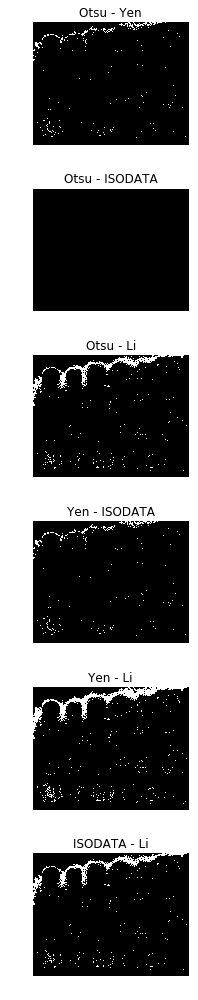

In [12]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots(6, 1, figsize=(6, 14))
k = 0
for i in range(len(imagens_dif)):
    # Plota imagem
    im_ = ax[i].imshow(imagens_dif[i], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(titulos_dif[i])
    
plt.tight_layout()
plt.show()

## Labels

In [13]:
im = data.coins()

im = img_as_float(im)

im_otsu = im > filters.threshold_otsu(im)

# Morfologia matemática. Verificar nas aulas de SIN393 dos anos anteriores.
im_otsu = morphology.closing(im_otsu, np.ones([3,3], dtype=float))

im_rotulos = measure.label(im_otsu)

im_rotulos_sobre = color.label2rgb(im_rotulos, image=im)

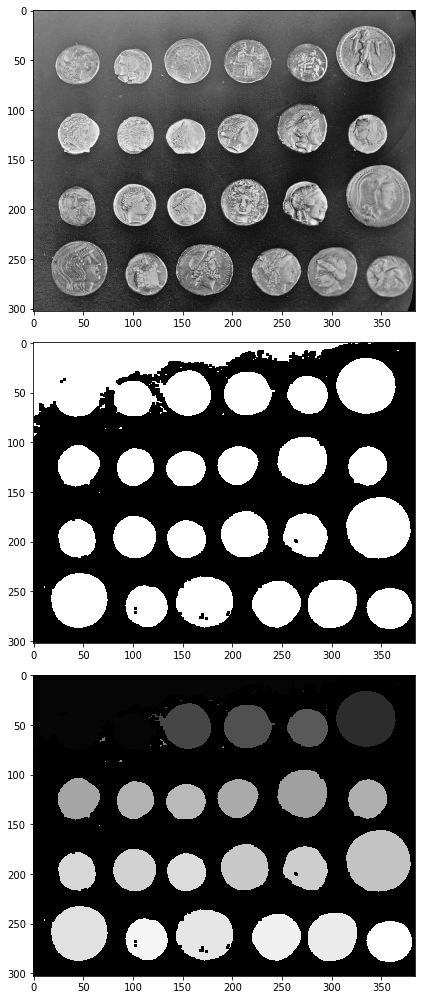

In [14]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(6, 14))
#ax.imshow(im_rotulos_sobre)


ax1.imshow(im, cmap='gray')

ax2.imshow(im_otsu, cmap='gray')

ax3.imshow(im_rotulos, cmap='gray')

plt.tight_layout()
plt.show()

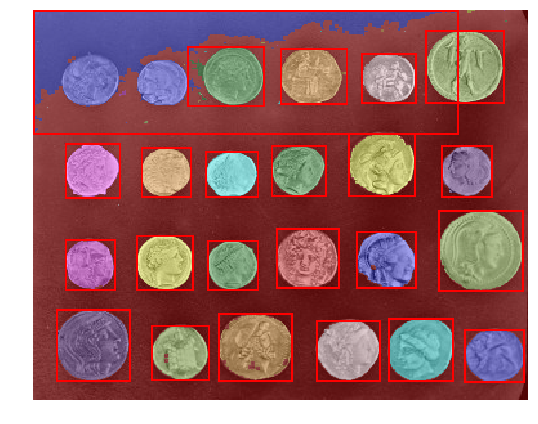

In [15]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(im_rotulos_sobre)

for region in measure.regionprops(im_rotulos):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
ax.set_axis_off()
plt.tight_layout()
plt.show()

## Efeitos da suavização na segmentação

In [16]:
im = data.coins()

im = img_as_float(im)

In [17]:
im_n = util.random_noise(im)

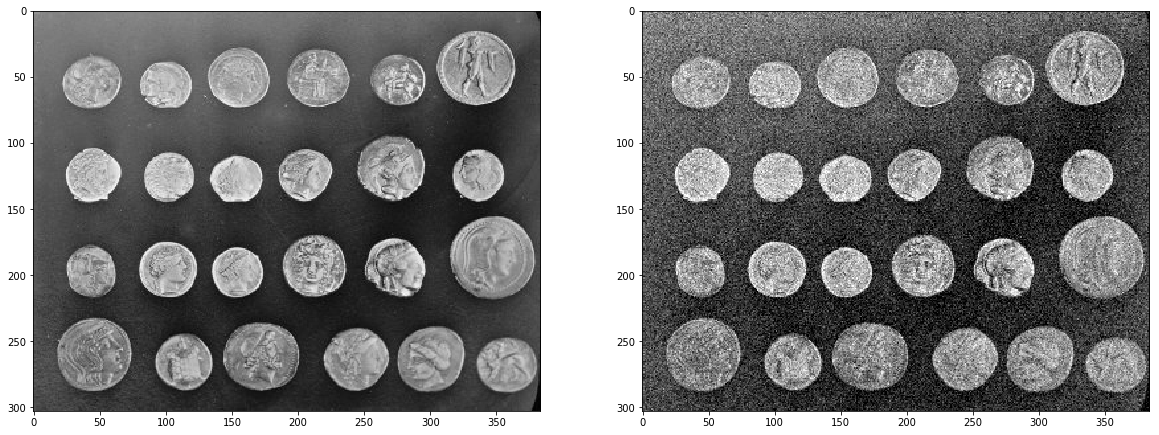

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(im_n, cmap='gray')

plt.show()

In [19]:
from scipy import ndimage as ndi

medias = [3, 5, 7, 9]

# Lista com as imagens filtradas pela média.
imagens_med = []
# Lista com as imagens segmentadas pelo método de Otsu.
imagens_seg = []
# Lista com os valores de limiares.
limiares = []

for media in medias:
    # Realiza a filtragem pela média
    im_med = ndi.filters.convolve(im_n, np.ones([media, media])/(media * media))
    imagens_med.append(im_med)
    
    # Calcula o limiar para cada imagem após a filtragem.
    limiar = filters.threshold_otsu(im_med)
    limiares.append(limiar)
    
    # Realiza a limiarização.
    im_temp = im_med > limiar
    imagens_seg.append(im_temp)    

In [20]:
limiares

[0.4101341947396135,
 0.40758914923843653,
 0.40622032263037366,
 0.4033557358052357]

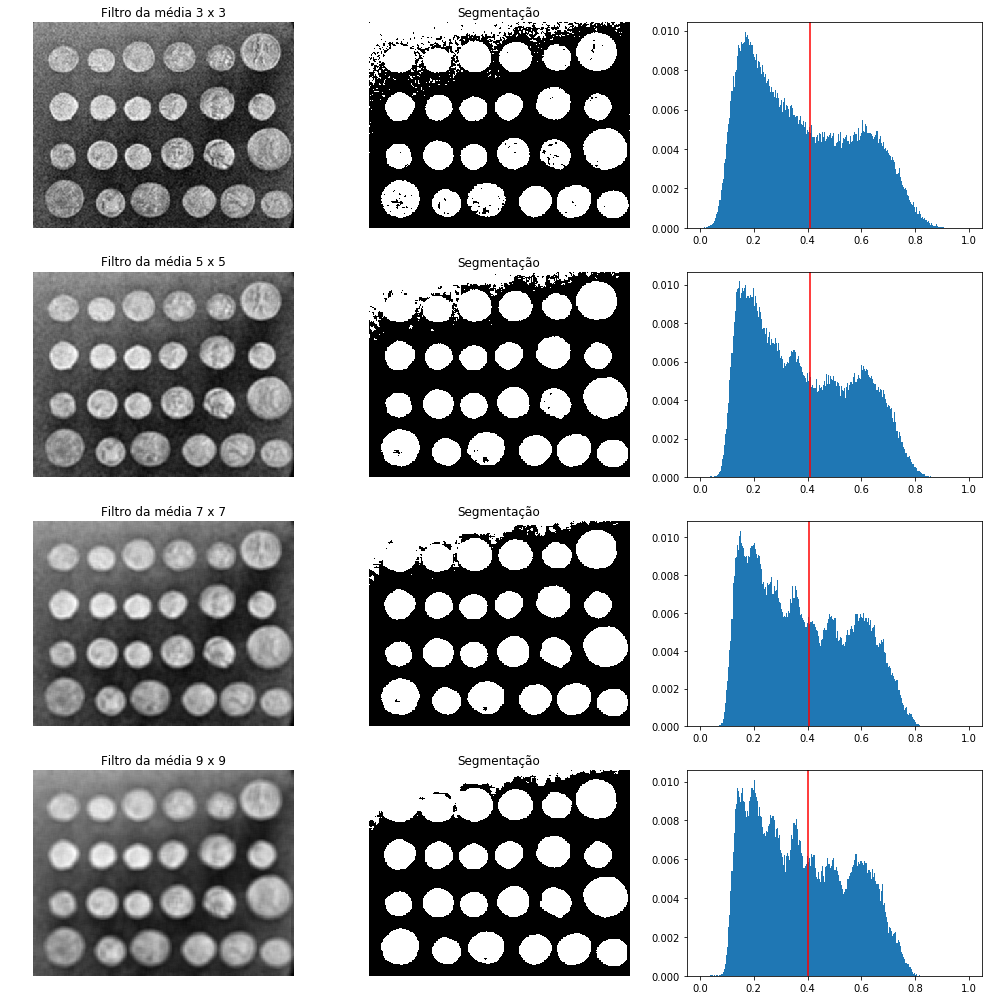

In [21]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots(4, 3, figsize=(14, 14))
for i in range(len(imagens_seg)):
    # Plota imagem
    im_ = ax[i, 0].imshow(imagens_med[i], cmap='gray')
    ax[i, 0].axis('off')
    ax[i, 0].set_title(str('Filtro da média ' + str(medias[i]) + ' x ' + str(medias[i])))
    
    # Plota imagem
    im_ = ax[i, 1].imshow(imagens_seg[i], cmap='gray')
    ax[i, 1].axis('off')
    ax[i, 1].set_title(str('Segmentação'))

    # Plota histograma
    ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
    weights = np.ones(imagens_med[i].ravel().shape)/float(im.size)
    ax[i, 2].hist(imagens_med[i].ravel(), bins=256, weights=weights, range=(0,1))
    
    ax[i, 2].axvline(limiares[i], color='r')
    
plt.tight_layout()
plt.show()

## Limiarização local

In [22]:
im = data.coins()

im = img_as_float(im)

num_l, num_c = im.shape
num_l, num_c

(303, 384)

Divide a imagens em sub-imagens usando fatiamento. Cada sub-imagem será segmentada individualmente usando o método de Otsu.

As sub-imagens segmentadas são combinadas em uma imagem única novamente.

In [23]:
num_tiles = 3

size_tile_l = int(num_l / num_tiles)
size_tile_c = int(num_c / num_tiles)

size_tile_l, size_tile_c

(101, 128)

In [24]:
lin = np.arange(0, num_l, num_l / num_tiles).astype(int)

col = np.arange(0, num_c, num_c/num_tiles).astype(int)

tiles = []
for l in lin:
    for c in col:
        im_tile = im[l:l+size_tile_l, c:c+size_tile_c]
        tiles.append(im_tile)

Plota as imagens na tela

In [25]:
# Lista com os limiares para cada sub-imagem
limiares = []
# Lista com as sub-imagens segmentadas
tiles_seg = []

for tile in tiles:
    limiar = filters.threshold_otsu(tile)
    limiares.append(limiar)
    
    tile_seg = tile > limiar
    tiles_seg.append(tile_seg)

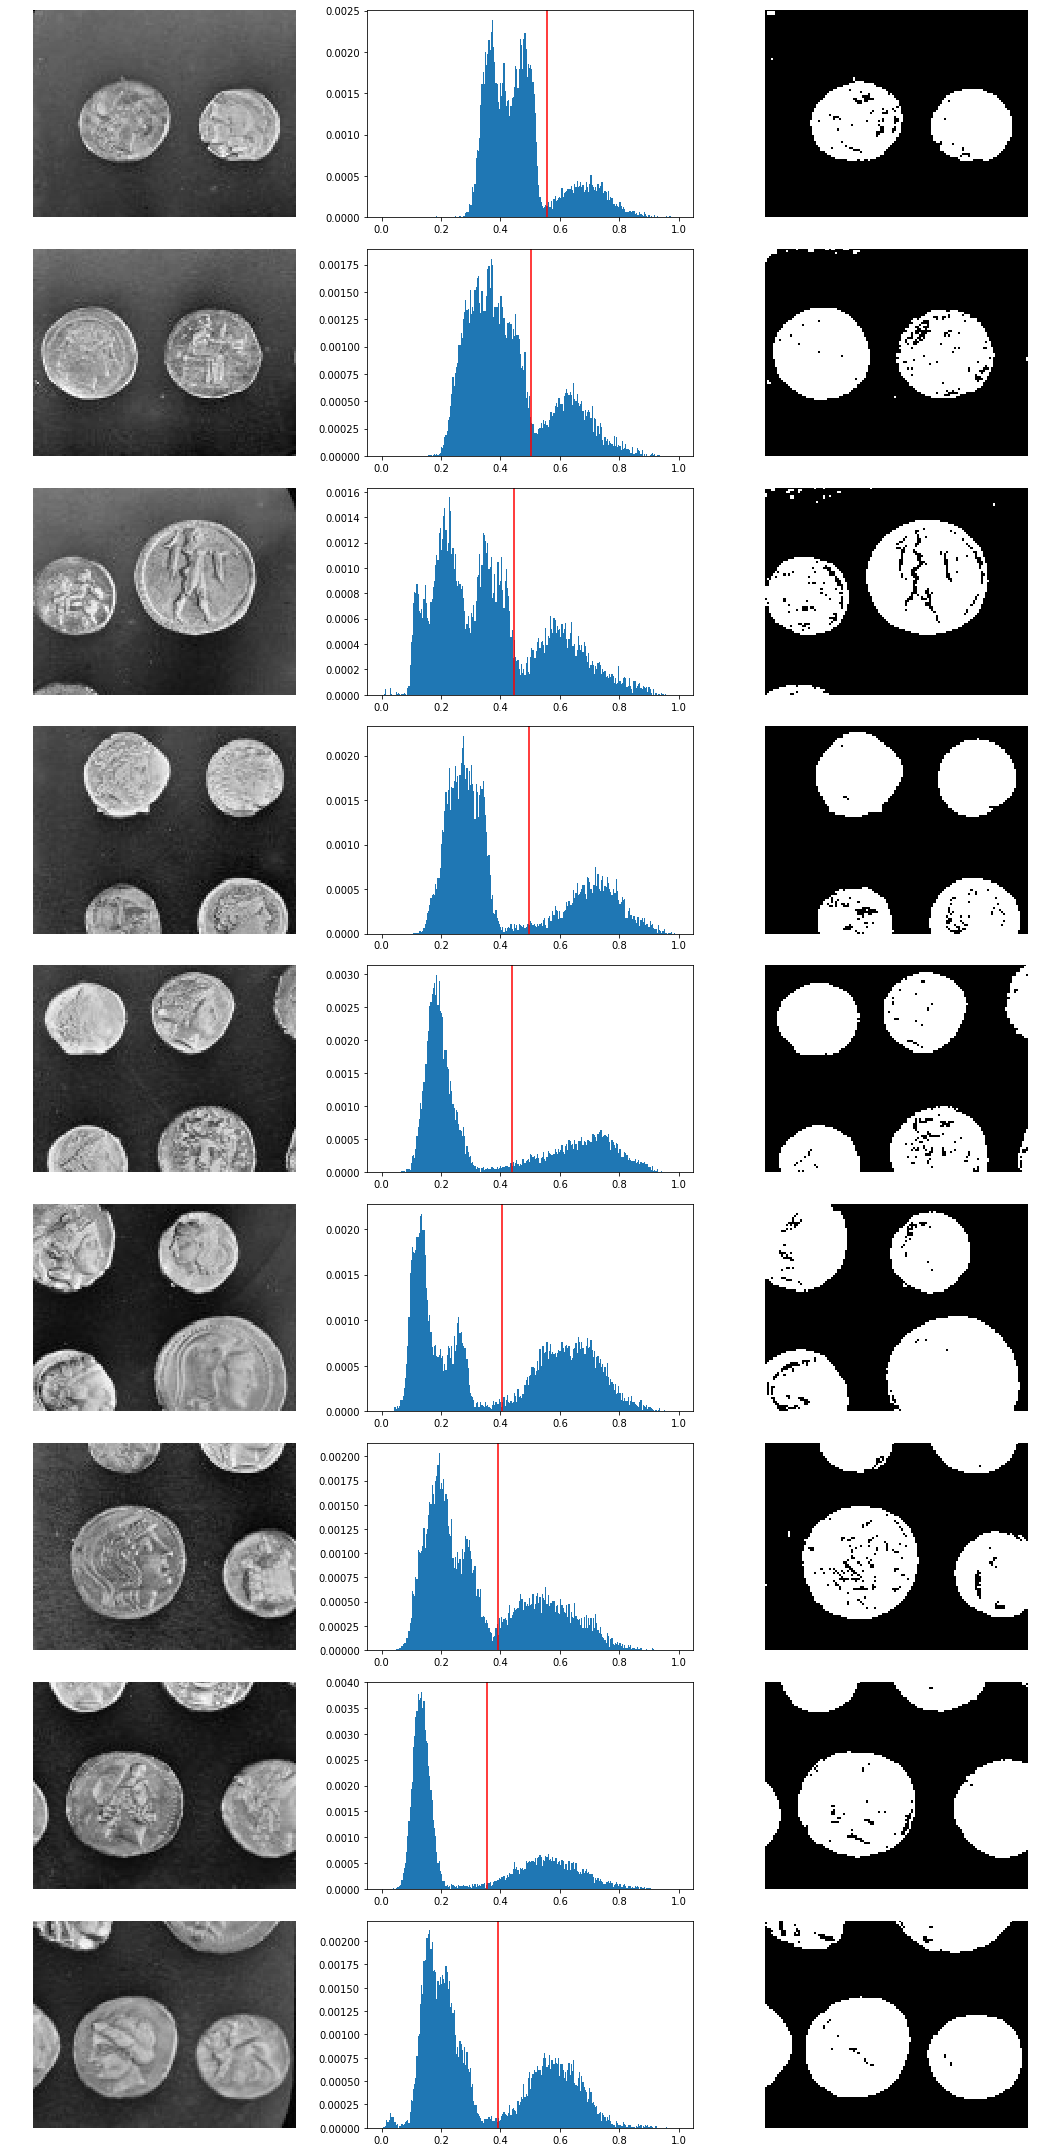

In [26]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots((num_tiles*num_tiles), 3, figsize=(15, 30))
for i in range(len(tiles)):
    # Plota imagem
    im_ = ax[i, 0].imshow(tiles[i], cmap='gray')
    ax[i, 0].axis('off')
    # ax[i, 0].set_title(str('Filtro da média ' + str(medias[i]) + ' x ' + str(medias[i])))
    
    # Plota histograma
    ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
    weights = np.ones(tiles[i].ravel().shape)/float(im.size)
    ax[i, 1].hist(tiles[i].ravel(), bins=256, weights=weights, range=(0,1))
    
    ax[i, 1].axvline(limiares[i], color='r')   
    
    im_ = ax[i, 2].imshow(tiles_seg[i], cmap='gray')
    ax[i, 2].axis('off')
    
plt.tight_layout()
plt.show()

Recombina as sub-imagens segmentadas.

In [27]:
tiles = []
i = 0
im_seg = np.zeros(im.shape)
for l in lin:
    for c in col:
        im_seg[l:l+size_tile_l, c:c+size_tile_c] = tiles_seg[i]
        i = i + 1

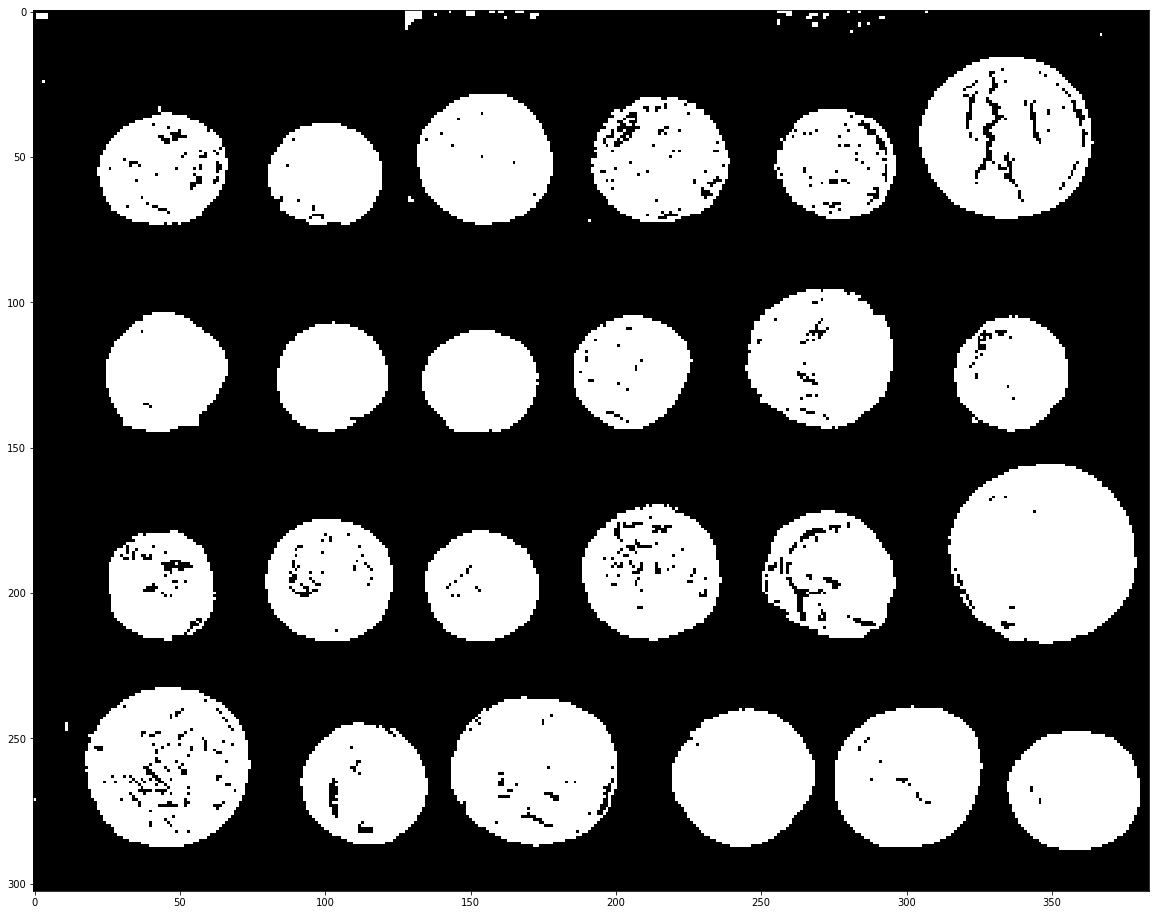

In [28]:
plt.figure(figsize=(20,20))

plt.imshow(im_seg, cmap='gray')

plt.show()

## Bibliografia

[1] **Scipy Lecture Notes**. 2017
    * Disponível em: http://www.scipy-lectures.org/

<img src='figuras/aula_06/scipy_ln_OK.png' style="height:500px">

[2] GONZALEZ, R.C.; WOODS, R.E. Processamento de Imagens Digitais. 3. ed. Pearson, 2010.


[3] Documentação do SciPy: 
    * Disponível em: https://www.scipy.org/scipylib/index.html

[4] Documentação do Scikit-image: 
    * Disponível em: http://scikit-image.org/docs/stable/